In [1]:
%matplotlib inline

In [2]:
from galsize_models.models import moster13_based_mock
mock = moster13_based_mock()
print("Number of model galaxies with logM* > {0:.1f} = {1:.2e}".format(np.log10(mock['mstar'].min()),len(mock)))

Number of model galaxies with logM* > 9.0 = 1.21e+06


In [3]:
from galsize_models.measurements import load_umachine_sdss_with_meert15
full_sdss, behroozi_complete, good_profile_mask = load_umachine_sdss_with_meert15()

sdss = full_sdss[behroozi_complete & good_profile_mask]

import os
repo_dirname = "/Users/aphearin/work/repositories/python/galsize_models"
output_subdirname = "galsize_models/measurements/data/two_point_functions"
output_dirname = os.path.join(repo_dirname, output_subdirname)

rp = np.load(os.path.join(output_dirname, 'sdss_sm9p75_smbell_rp.npy'))
wp_sdss_sm9p75_smbell = np.load(os.path.join(output_dirname, 'sdss_sm9p75_smbell_wp.npy'))
wp_sdss_sm9p75_smbell_small = np.load(os.path.join(output_dirname, 'sdss_sm9p75_smbell_small_wp.npy'))
wp_sdss_sm9p75_smbell_large = np.load(os.path.join(output_dirname, 'sdss_sm9p75_smbell_large_wp.npy'))
fracdiff_sm9p75_smbell = (wp_sdss_sm9p75_smbell_large-wp_sdss_sm9p75_smbell_small)/wp_sdss_sm9p75_smbell

wp_sdss_sm10p0_smbell = np.load(os.path.join(output_dirname, 'sdss_sm10p0_smbell_wp.npy'))
wp_sdss_sm10p0_smbell_small = np.load(os.path.join(output_dirname, 'sdss_sm10p0_smbell_small_wp.npy'))
wp_sdss_sm10p0_smbell_large = np.load(os.path.join(output_dirname, 'sdss_sm10p0_smbell_large_wp.npy'))
fracdiff_sm10p0_smbell = (wp_sdss_sm10p0_smbell_large-wp_sdss_sm10p0_smbell_small)/wp_sdss_sm10p0_smbell

wp_sdss_sm10p25_smbell = np.load(os.path.join(output_dirname, 'sdss_sm10p25_smbell_wp.npy'))
wp_sdss_sm10p25_smbell_small = np.load(os.path.join(output_dirname, 'sdss_sm10p25_smbell_small_wp.npy'))
wp_sdss_sm10p25_smbell_large = np.load(os.path.join(output_dirname, 'sdss_sm10p25_smbell_large_wp.npy'))
fracdiff_sm10p25_smbell = (wp_sdss_sm10p25_smbell_large-wp_sdss_sm10p25_smbell_small)/wp_sdss_sm10p25_smbell

wp_sdss_sm10p5_smbell = np.load(os.path.join(output_dirname, 'sdss_sm10p5_smbell_wp.npy'))
wp_sdss_sm10p5_smbell_small = np.load(os.path.join(output_dirname, 'sdss_sm10p5_smbell_small_wp.npy'))
wp_sdss_sm10p5_smbell_large = np.load(os.path.join(output_dirname, 'sdss_sm10p5_smbell_large_wp.npy'))
fracdiff_sm10p5_smbell = (wp_sdss_sm10p5_smbell_large-wp_sdss_sm10p5_smbell_small)/wp_sdss_sm10p5_smbell

wp_sdss_sm10p75_smbell = np.load(os.path.join(output_dirname, 'sdss_sm10p75_smbell_wp.npy'))
wp_sdss_sm10p75_smbell_small = np.load(os.path.join(output_dirname, 'sdss_sm10p75_smbell_small_wp.npy'))
wp_sdss_sm10p75_smbell_large = np.load(os.path.join(output_dirname, 'sdss_sm10p75_smbell_large_wp.npy'))
fracdiff_sm10p75_smbell = (wp_sdss_sm10p75_smbell_large-wp_sdss_sm10p75_smbell_small)/wp_sdss_sm10p75_smbell

wp_sdss_sm11_smbell = np.load(os.path.join(output_dirname, 'sdss_sm11_smbell_wp.npy'))
wp_sdss_sm11_smbell_small = np.load(os.path.join(output_dirname, 'sdss_sm11_smbell_small_wp.npy'))
wp_sdss_sm11_smbell_large = np.load(os.path.join(output_dirname, 'sdss_sm11_smbell_large_wp.npy'))
fracdiff_sm11_smbell = (wp_sdss_sm11_smbell_large-wp_sdss_sm11_smbell_small)/wp_sdss_sm11_smbell

wp_sdss_sm11p25_smbell = np.load(os.path.join(output_dirname, 'sdss_sm11p25_smbell_wp.npy'))
wp_sdss_sm11p25_smbell_small = np.load(os.path.join(output_dirname, 'sdss_sm11p25_smbell_small_wp.npy'))
wp_sdss_sm11p25_smbell_large = np.load(os.path.join(output_dirname, 'sdss_sm11p25_smbell_large_wp.npy'))
fracdiff_sm11p25_smbell = (wp_sdss_sm11p25_smbell_large-wp_sdss_sm11p25_smbell_small)/wp_sdss_sm11p25_smbell

In [4]:
from galsize_models.models import component_size_vs_rhalo

rvir = mock['rvir_zpeak']
normalization_all = 0.0125
alpha_all = 1.
scatter_all = 0.15
size_seed=14041

mock['r50'] = component_size_vs_rhalo(rvir, 
                        normalization_all, alpha_all, 
                        scatter=scatter_all, seed=size_seed)

from scipy.stats import binned_statistic
logsm_bins = np.linspace(9, 12.25, 35)
logsm_mids = 0.5*(logsm_bins[:-1] + logsm_bins[1:])

median_rhalf_mock, __, __ = binned_statistic(
        np.log10(mock['mstar']), mock['r50'], bins=logsm_bins)

mock['r50_median'] = np.interp(np.log10(mock['mstar']), 
                              logsm_mids, median_rhalf_mock)


In [5]:
from galsize_models.measurements import single_component_ratios
result = single_component_ratios(mock)
rp_mids, fracdiff_sm9p75_mock, fracdiff_sm10p25_mock, \
fracdiff_sm10p75_mock, fracdiff_sm11p25_mock = result

In [6]:
def scramble_virial_radii(sample, bin_edges):
    scrambled_rvir = np.zeros(len(sample))
    for low, high in zip(bin_edges[:-1], bin_edges[1:]):
        mpeak_mask = (sample['mpeak'] >= low) & (sample['mpeak'] < high)
        num_in_bin = np.count_nonzero(mpeak_mask)
        if num_in_bin > 2:
            sample_in_bin = sample[mpeak_mask]
            randoms = np.random.choice(np.arange(num_in_bin), num_in_bin, replace=False)
            scrambled_rvir[mpeak_mask] = sample_in_bin['rvir_zpeak'][randoms.astype(int)]
    return scrambled_rvir

In [7]:
mpeak_bins = np.logspace(11, 15, 50)

scrambling_mask = (mock['scale_factor_firstacc'] > 1)
scrambled_rvir_zpeak = scramble_virial_radii(mock[scrambling_mask], mpeak_bins)

rvir = np.copy(mock['rvir_zpeak'])
rvir[scrambling_mask] = scrambled_rvir_zpeak

mock['r50'] = component_size_vs_rhalo(rvir, 
                        normalization_all, alpha_all, 
                        scatter=scatter_all, seed=size_seed)

from scipy.stats import binned_statistic
logsm_bins = np.linspace(9, 12.25, 35)
logsm_mids = 0.5*(logsm_bins[:-1] + logsm_bins[1:])

median_rhalf_mock, __, __ = binned_statistic(
        np.log10(mock['mstar']), mock['r50'], bins=logsm_bins)

mock['r50_median'] = np.interp(np.log10(mock['mstar']), 
                              logsm_mids, median_rhalf_mock)

result = single_component_ratios(mock)
rp_mids, fracdiff_sm9p75_mock_scrambled_truecens, fracdiff_sm10p25_mock_scrambled_truecens, \
fracdiff_sm10p75_mock_scrambled_truecens, fracdiff_sm11p25_mock_scrambled_truecens = result


In [8]:
scrambling_mask = (mock['upid'] == -1)
scrambled_rvir_zpeak = scramble_virial_radii(mock[scrambling_mask], mpeak_bins)

rvir = np.copy(mock['rvir_zpeak'])
rvir[scrambling_mask] = scrambled_rvir_zpeak

mock['r50'] = component_size_vs_rhalo(rvir, 
                        normalization_all, alpha_all, 
                        scatter=scatter_all, seed=size_seed)

from scipy.stats import binned_statistic
logsm_bins = np.linspace(9, 12.25, 35)
logsm_mids = 0.5*(logsm_bins[:-1] + logsm_bins[1:])

median_rhalf_mock, __, __ = binned_statistic(
        np.log10(mock['mstar']), mock['r50'], bins=logsm_bins)

mock['r50_median'] = np.interp(np.log10(mock['mstar']), 
                              logsm_mids, median_rhalf_mock)

result = single_component_ratios(mock)
rp_mids, fracdiff_sm9p75_mock_scrambled_allcens, fracdiff_sm10p25_mock_scrambled_allcens, \
fracdiff_sm10p75_mock_scrambled_allcens, fracdiff_sm11p25_mock_scrambled_allcens = result


In [9]:
scrambling_mask = mock['upid'] != -1
scrambled_rvir_zpeak = scramble_virial_radii(mock[scrambling_mask], mpeak_bins)

rvir = np.copy(mock['rvir_zpeak'])
rvir[scrambling_mask] = scrambled_rvir_zpeak

mock['r50'] = component_size_vs_rhalo(rvir, 
                        normalization_all, alpha_all, 
                        scatter=scatter_all, seed=size_seed)

from scipy.stats import binned_statistic
logsm_bins = np.linspace(9, 12.25, 35)
logsm_mids = 0.5*(logsm_bins[:-1] + logsm_bins[1:])

median_rhalf_mock, __, __ = binned_statistic(
        np.log10(mock['mstar']), mock['r50'], bins=logsm_bins)

mock['r50_median'] = np.interp(np.log10(mock['mstar']), 
                              logsm_mids, median_rhalf_mock)

result = single_component_ratios(mock)
rp_mids, fracdiff_sm9p75_mock_scrambled_sats, fracdiff_sm10p25_mock_scrambled_sats, \
fracdiff_sm10p75_mock_scrambled_sats, fracdiff_sm11p25_mock_scrambled_sats = result


In [10]:
mpeak_bins = np.logspace(11, 15, 50)

scrambling_mask = np.ones(len(mock), dtype=bool)
scrambled_rvir_zpeak = scramble_virial_radii(mock[scrambling_mask], mpeak_bins)

rvir = np.copy(mock['rvir_zpeak'])
rvir[scrambling_mask] = scrambled_rvir_zpeak

mock['r50'] = component_size_vs_rhalo(rvir, 
                        normalization_all, alpha_all, 
                        scatter=scatter_all, seed=size_seed)

from scipy.stats import binned_statistic
logsm_bins = np.linspace(9, 12.25, 35)
logsm_mids = 0.5*(logsm_bins[:-1] + logsm_bins[1:])

median_rhalf_mock, __, __ = binned_statistic(
        np.log10(mock['mstar']), mock['r50'], bins=logsm_bins)

mock['r50_median'] = np.interp(np.log10(mock['mstar']), 
                              logsm_mids, median_rhalf_mock)

result = single_component_ratios(mock)
rp_mids, fracdiff_sm9p75_mock_scrambled_all, fracdiff_sm10p25_mock_scrambled_all, \
fracdiff_sm10p75_mock_scrambled_all, fracdiff_sm11p25_mock_scrambled_all = result


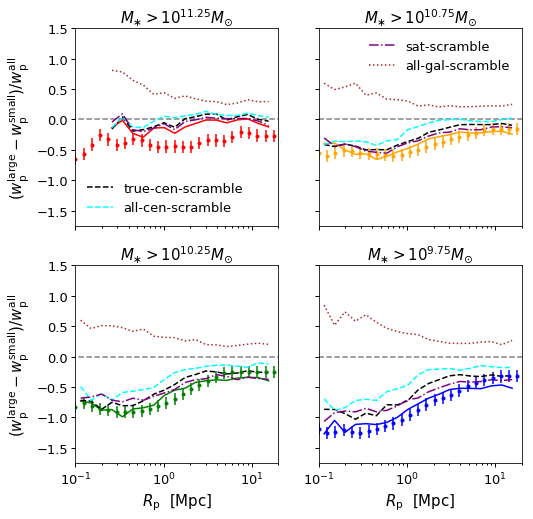

In [18]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, 
                                             figsize=(8, 8))

axes = ax1, ax2, ax3, ax4

for ax in axes:
    ylim = ax.set_ylim(-1.75, 1.5)
    xlim = ax.set_xlim(0.1, 20)
    xscale = ax.set_xscale('log')
    __=ax.plot(np.logspace(-2, 2, 100), np.zeros(100), '--', color='gray')

    
__=ax1.errorbar(rp, fracdiff_sm11p25_smbell, 0.1, fmt='.', color='red')
__=ax2.errorbar(rp, fracdiff_sm10p75_smbell, 0.1, fmt='.', color='orange')
__=ax3.errorbar(rp, fracdiff_sm10p25_smbell, 0.1, fmt='.', color='green')
__=ax4.errorbar(rp, fracdiff_sm9p75_smbell, 0.1, fmt='.', color='blue')


__=ax1.plot(rp_mids[3:], fracdiff_sm11p25_mock[3:], color='red')
__=ax2.plot(rp_mids, fracdiff_sm10p75_mock, color='orange')
__=ax3.plot(rp_mids, fracdiff_sm10p25_mock, color='green')
__=ax4.plot(rp_mids, fracdiff_sm9p75_mock, color='blue')

__=ax1.plot(rp_mids[3:], fracdiff_sm11p25_mock_scrambled_truecens[3:], '--', color='k', label=r'true-cen-scramble')
__=ax2.plot(rp_mids, fracdiff_sm10p75_mock_scrambled_truecens, '--', color='k')
__=ax3.plot(rp_mids, fracdiff_sm10p25_mock_scrambled_truecens, '--', color='k')
__=ax4.plot(rp_mids, fracdiff_sm9p75_mock_scrambled_truecens, '--', color='k')

__=ax1.plot(rp_mids[3:], fracdiff_sm11p25_mock_scrambled_allcens[3:], '--', color='cyan', label=r'all-cen-scramble')
__=ax2.plot(rp_mids, fracdiff_sm10p75_mock_scrambled_allcens, '--', color='cyan')
__=ax3.plot(rp_mids, fracdiff_sm10p25_mock_scrambled_allcens, '--', color='cyan')
__=ax4.plot(rp_mids, fracdiff_sm9p75_mock_scrambled_allcens, '--', color='cyan')

__=ax1.plot(rp_mids[3:], fracdiff_sm11p25_mock_scrambled_sats[3:], '-.', color='purple')
__=ax2.plot(rp_mids, fracdiff_sm10p75_mock_scrambled_sats, '-.', color='purple', label=r'sat-scramble')
__=ax3.plot(rp_mids, fracdiff_sm10p25_mock_scrambled_sats, '-.', color='purple')
__=ax4.plot(rp_mids, fracdiff_sm9p75_mock_scrambled_sats, '-.', color='purple')

__=ax1.plot(rp_mids[3:], fracdiff_sm11p25_mock_scrambled_all[3:], ':', color='brown')
__=ax2.plot(rp_mids, fracdiff_sm10p75_mock_scrambled_all, ':', color='brown', label=r'all-gal-scramble')
__=ax3.plot(rp_mids, fracdiff_sm10p25_mock_scrambled_all, ':', color='brown')
__=ax4.plot(rp_mids, fracdiff_sm9p75_mock_scrambled_all, ':', color='brown')

__=ax1.set_title(r'$M_{\ast} > 10^{11.25}M_{\odot}$')
__=ax2.set_title(r'$M_{\ast} > 10^{10.75}M_{\odot}$')
__=ax3.set_title(r'$M_{\ast} > 10^{10.25}M_{\odot}$')
__=ax4.set_title(r'$M_{\ast} > 10^{9.75}M_{\odot}$')

ylabel1 = ax1.set_ylabel(r'$(w_{\rm p}^{\rm large} - w_{\rm p}^{\rm small}) / w_{\rm p}^{\rm all}$')
ylabel3 = ax3.set_ylabel(r'$(w_{\rm p}^{\rm large} - w_{\rm p}^{\rm small}) / w_{\rm p}^{\rm all}$')
xlabel3 = ax3.set_xlabel(r'$R_{\rm p}$  $[{\rm Mpc}]$')
xlabel4 = ax4.set_xlabel(r'$R_{\rm p}$  $[{\rm Mpc}]$')

leg1 = ax1.legend()
leg2 = ax2.legend()

figname = 'scrambled_size_clustering_ratios.pdf'
fig.savefig(figname, bbox_extra_artists=[xlabel3, ylabel3], bbox_inches='tight')


In [12]:
print(mock.keys())

['upid', 'mpeak', 'scale_factor_mpeak', 'x', 'y', 'z', 'zpeak', 'vmax_mpeak', 'scale_factor_firstacc', 'mvir_firstacc', 'halfmass_scale_factor', 'vx', 'vy', 'vz', 'rvir_zpeak', 'vmax_at_mpeak_percentile', 'mvir_host_halo', 'spin', 'uran', 'mstar', 'mstar_moster13', 'r50', 'r50_median']
